# Demonstration: QCNN algorithm


In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses

### Ising Chain
#### Phases:
    1. Paramagnetic:  Label = 0
    2. Ferromagnetic: Label = 1

In [2]:
# States parameters
N        = 8
side     = 100

# Learning parameters
lr       = 0.3
n_epochs = 1000


In [3]:
myvqe  = vqe.load_vqe('../data/vqes/standard/N'+str(N)+'n'+str(side))
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit)

/home/saverio/Desktop/Quantum-Phase-Detection-ANNNI/src/PhaseEstimation/vqe.py:496: UserWarning: Outdated VQE: VQD parameters loaded
  warnings.warn("Outdated VQE: VQD parameters loaded")


In [4]:
myqcnn.train(lr, n_epochs, train_index = np.arange(side), loss_fn = losses.cross_entropy1D)

Cost: 0.22518904507160187: 100%|██████████| 10000/10000 [01:44<00:00, 95.90it/s] 


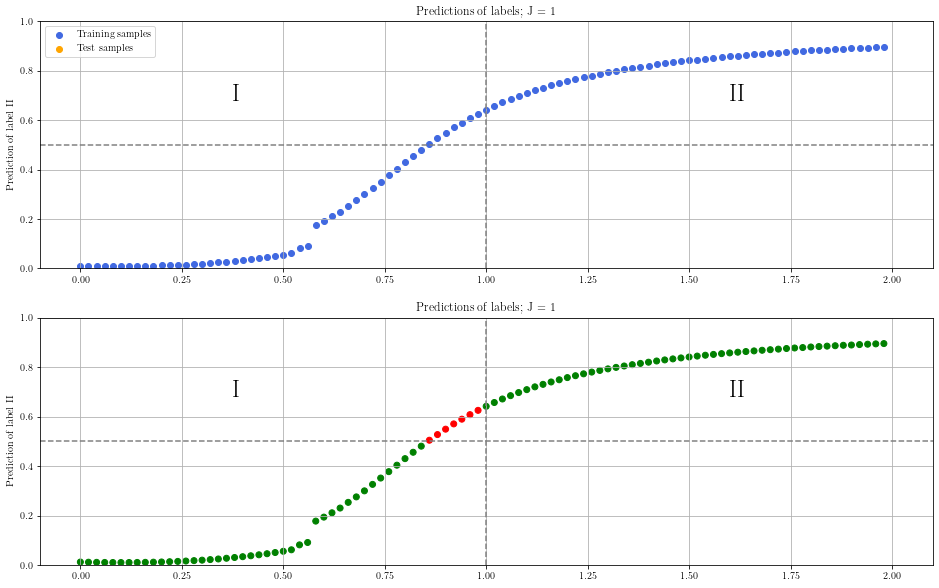

In [5]:
myqcnn.show(np.arange(side))

### ANNNI Model
#### Phases:
    1. Paramagnetic:  Label = [1,1]; [1,0,0,0]
    2. Ferromagnetic: Label = [0,1]; [0,0,1,0]
    3. Antiphase:     Label = [1,0]; [0,1,0,0]

In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses

In [2]:
# States parameters
N        = 6

# Learning parameters
lr       = 0.1
n_epochs = 2000

In [3]:
myvqe  = vqe.load_vqe('./data/sample_vqe')
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit, n_outputs=2)

In [4]:
sidex = myqcnn.vqe.Hs.n_kappas
sidey = myqcnn.vqe.Hs.n_hs

In [5]:
myqcnn.train(lr, n_epochs, train_index = np.arange(sidex*sidey), loss_fn = losses.cross_entropy_power4)

Cost: 0.0005591092631220818: 100%|██████████| 2000/2000 [00:42<00:00, 47.39it/s]


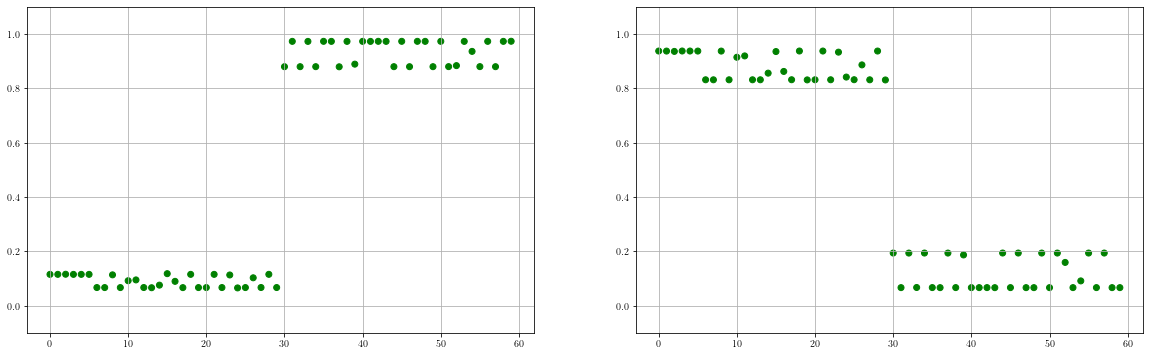

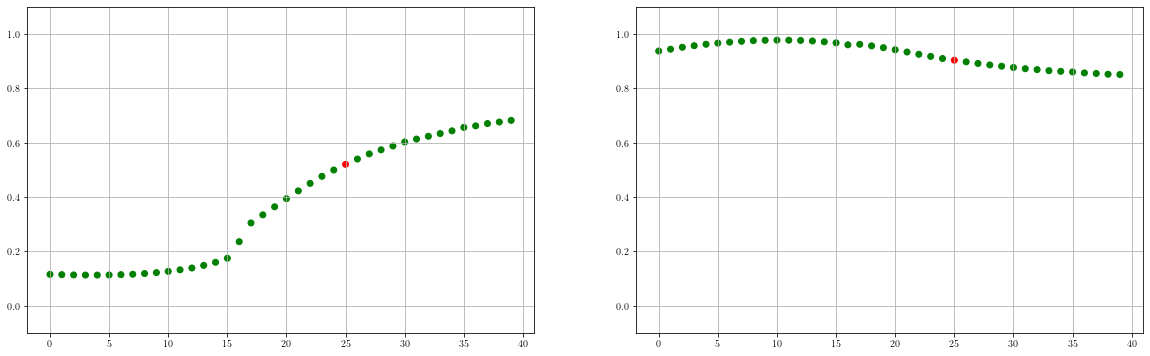

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: divide by zero encountered in divide
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)
/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in multiply
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


<Figure size 640x480 with 0 Axes>

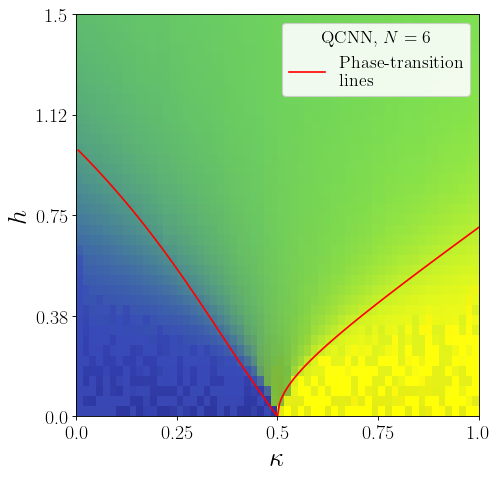

In [6]:
myqcnn.show(marginal = True, hard_thr=False)